In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

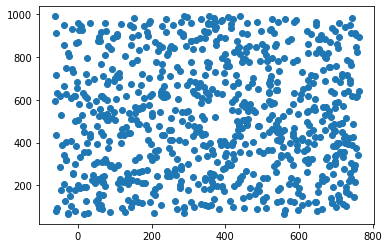

In [2]:
df = pd.read_csv("datasets/paw_shaped/paw02a-800-7-0-BI.csv")
df = df.rename({'y': 'Y'}, axis=1) 
df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)

y = df.values[:,-1].astype(int)
X = df.drop("Y", axis=1)

plt.scatter(X['dim1'], X['dim2'])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

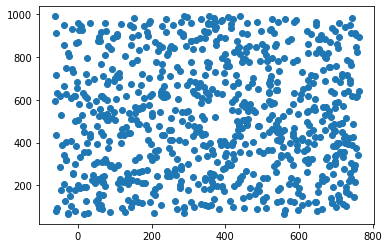

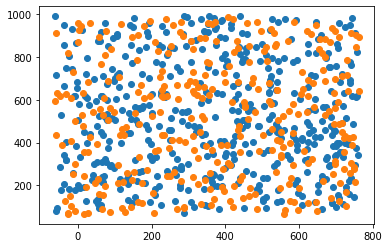

In [4]:
plt.scatter(X['dim1'], X['dim2'])
plt.show()
plt.scatter(X_train['dim1'], X_train['dim2'])
plt.scatter(X_test['dim1'], X_test['dim2'])
plt.show()


<AxesSubplot:xlabel='dim1', ylabel='dim2'>

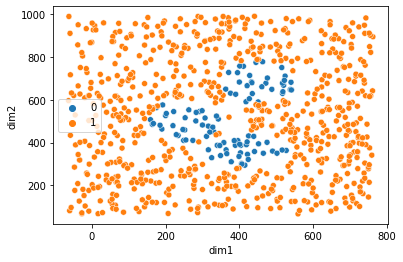

In [5]:
#sns.scatterplot(x=X['dim1'], y=X['dim2'], sizes=(20,6), palette="tab10", hue=y)
sns.scatterplot(data = df, x='dim1', y='dim2', sizes=(20,6), palette="tab10", hue=y)

2021-04-29 12:54:23,413:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


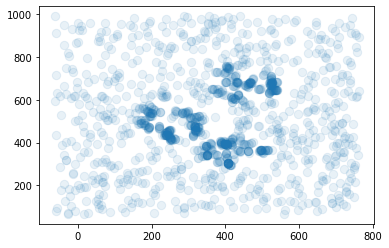

In [6]:
import smote_variants as sv

oversampler = sv.distance_SMOTE()

X_samp, y_samp = oversampler.sample(X.values, y)

plt.scatter(X_samp[:, 0], X_samp[:, 1], s=70, alpha=0.1) # new dataset
#plt.scatter(X['dim1'], X['dim2'], s=70, alpha=0.03)
plt.show()

<AxesSubplot:>

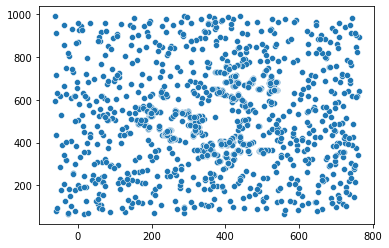

In [7]:
sns.scatterplot(x=X_samp[:, 0], y=X_samp[:, 1], sizes=(20,6), palette="tab10")

min_impurity_split', None), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('random_state', None), ('splitter', 'best')]))"]
["('noisy_data', OrderedDict([('k_neighbors', 3), ('n_neighbors', 5), ('proportion', 0.1), ('random_state', None)]), 'KNeighborsClassifier', OrderedDict([('algorithm', 'auto'), ('leaf_size', 30), ('metric', 'minkowski'), ('metric_params', None), ('n_jobs', None), ('n_neighbors', 5), ('p', 2), ('weights', 'uniform')]))", "('noisy_data', OrderedDict([('k_neighbors', 3), ('n_neighbors', 5), ('proportion', 0.1), ('random_state', None)]), 'DecisionTreeClassifier', OrderedDict([('ccp_alpha', 0.0), ('class_weight', None), ('criterion', 'gini'), ('max_depth', None), ('max_features', None), ('max_leaf_nodes', None), ('min_impurity_decrease', 0.0), ('min_impurity_split', None), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('random_state', None), ('splitter', 'best')]))"]
["('noisy_data', Ordere

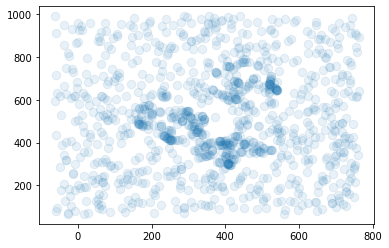

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import shutil
import smote_variants as sv

cache_path = os.path.join(os.path.expanduser('~'), 'smote_tests\smote_test')
print(cache_path)

if not os.path.exists(cache_path):
    os.makedirs(cache_path)
else:
    shutil.rmtree(cache_path)

dataset= {'data': X.values, 'target': y, 'name': 'noisy_data'}

# samp_obj and cl_obj contain the oversampling and classifier objects which give the
# best performance together
samp_obj, cl_obj = sv.model_selection(dataset= dataset,
                                        samplers= sv.get_n_quickest_oversamplers(10),
                                        classifiers= [KNeighborsClassifier(), DecisionTreeClassifier()],
                                        cache_path= cache_path,
                                        n_jobs= 5,
                                        max_samp_par_comb= 35)

# training the best techniques using the entire dataset
X_samp, y_samp = samp_obj.sample(dataset['data'], dataset['target'])
cl_obj.fit(X_samp, y_samp)

plt.scatter(X_samp[:, 0], X_samp[:, 1], s=70, alpha=0.1)
plt.show()

In [11]:
### Next step: DO this with all the 6 datasets
### Compare before sampling and after sampling results with reports

In [12]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.4)

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train1, y_train1)
y_pred1 = classifier.predict(X_test1)

from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.99      0.99      0.99       286

    accuracy                           0.98       320
   macro avg       0.96      0.95      0.96       320
weighted avg       0.98      0.98      0.98       320



In [20]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_samp, y_samp, test_size = 0.4)

sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train2, y_train2)
y_pred2 = classifier.predict(X_test2)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       169
           1       0.99      0.98      0.98       271

    accuracy                           0.98       440
   macro avg       0.98      0.98      0.98       440
weighted avg       0.98      0.98      0.98       440



In [14]:
# Before

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def evaluate_model(X_train, y_train, X_test, y_test, model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	model.fit(X_train, y_train)
	return cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

models, names = list(), list()
# KNN
models.append(KNeighborsClassifier())
names.append('KNN')
# RF
models.append(RandomForestClassifier(n_estimators=1000))
names.append(' RF')
# ET
models.append(ExtraTreesClassifier(n_estimators=1000))
names.append(' ET')

results = list()
for i in range(len(models)):
	scores = evaluate_model(X_train, y_train, X_test, y_test, models[i])
	results.append(scores)
	print('>%s %.3f (%.3f)' % (names[i], scores.mean(), scores.std()))


"""
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
"""

>KNN 0.947 (0.022)
> RF 0.953 (0.024)
> ET 0.956 (0.019)


'\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n\nclassifier = KNeighborsClassifier(n_neighbors = 1)\nclassifier.fit(X_train, y_train)\ny_pred = classifier.predict(X_test)\n\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\n'

In [15]:
# Let's say we have 4 features: x1, x2, x3, x4
# 1. Function which returns all the possible combinations: E.g.: For 3 features: (x1, x2), (x2, x3),(x1, x3), (x1, x2, x3).
# 2. We Iterate through this list, and for each, we try to find the best oversampler (augmentation method) out of 5-10 oversamplers.
# 3. We run RandomForestClassifier and for each itertation, we save the rankings of the features based on importance.
# 3.2. Upon validation we take the same subsets of the validation set!
# 4. Write our own evaulation method: Take the rankings and select the top 3 features(, and the best oversampler.)

# For 2 features only:
# 

In [16]:
import smote_variants as sv

oversamplers= sv.get_all_oversamplers()
print(oversamplers[0])

<class 'smote_variants._smote_variants.NoSMOTE'>


In [17]:
runtimes = {'SPY': 0.11, 'OUPS': 0.16, 'SMOTE_D': 0.20, 'NT_SMOTE': 0.20,
            'Gazzah': 0.21, 'ROSE': 0.25, 'NDO_sampling': 0.27,
            'Borderline_SMOTE1': 0.28, 'SMOTE': 0.28,
            'Borderline_SMOTE2': 0.29, 'ISMOTE': 0.30, 'SMMO': 0.31,
            'SMOTE_OUT': 0.37, 'SN_SMOTE': 0.44, 'Selected_SMOTE': 0.47,
            'distance_SMOTE': 0.47, 'Gaussian_SMOTE': 0.48, 'MCT': 0.51,
            'Random_SMOTE': 0.57, 'ADASYN': 0.58, 'SL_graph_SMOTE': 0.58,
            'CURE_SMOTE': 0.59, 'ANS': 0.63, 'MSMOTE': 0.72,
            'Safe_Level_SMOTE': 0.79, 'SMOBD': 0.80, 'CBSO': 0.81,
            'Assembled_SMOTE': 0.82, 'SDSMOTE': 0.88,
            'SMOTE_TomekLinks': 0.91, 'Edge_Det_SMOTE': 0.94,
            'ProWSyn': 1.00, 'Stefanowski': 1.04, 'NRAS': 1.06,
            'AND_SMOTE': 1.13, 'DBSMOTE': 1.17, 'polynom_fit_SMOTE': 1.18,
            'ASMOBD': 1.18, 'MDO': 1.18, 'SOI_CJ': 1.24, 'LN_SMOTE': 1.26,
            'VIS_RST': 1.34, 'TRIM_SMOTE': 1.36, 'LLE_SMOTE': 1.62,
            'SMOTE_ENN': 1.86, 'SMOTE_Cosine': 2.00, 'kmeans_SMOTE': 2.43,
            'MWMOTE': 2.45, 'V_SYNTH': 2.59, 'A_SUWO': 2.81,
            'RWO_sampling': 2.91, 'SMOTE_RSB': 3.88, 'ADOMS': 3.89,
            'SMOTE_IPF': 4.10, 'Lee': 4.16, 'SMOTE_FRST_2T': 4.18,
            'cluster_SMOTE': 4.19, 'SOMO': 4.30, 'DE_oversampling': 4.67,
            'CCR': 4.72, 'NRSBoundary_SMOTE': 5.26, 'AHC': 5.27,
            'ISOMAP_Hybrid': 6.11, 'LVQ_SMOTE': 6.99, 'CE_SMOTE': 7.45,
            'MSYN': 11.92, 'PDFOS': 15.14, 'KernelADASYN': 17.87,
            'G_SMOTE': 19.23, 'E_SMOTE': 19.50, 'SVM_balance': 24.05,
            'SUNDO': 26.21, 'GASMOTE': 31.38, 'DEAGO': 33.39,
            'NEATER': 41.39, 'SMOTE_PSO': 45.12, 'IPADE_ID': 90.01,
            'DSMOTE': 146.73, 'MOT2LD': 149.42, 'Supervised_SMOTE': 195.74,
            'SSO': 215.27, 'DSRBF': 272.11, 'SMOTE_PSOBAT': 324.31,
            'ADG': 493.64, 'AMSCO': 1502.36}
print(len(runtimes))

85


In [18]:
import itertools

feature_set = [1, 2, 3, 4]
for L in range(2, len(feature_set)+1):
    for subset in itertools.combinations(feature_set, L):
        print(subset)

(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)
(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)
(1, 2, 3, 4)
